# **Title of Project**

Handwritten Digit Predication- Classification Analysis

## **Objectives**

To classify  8X8 pixel grayscale value data according to the digit they represent.

## **Data Source**

The data set contains images of hand-written digits: 10 classes where each class refers to a digit. 2x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block.

## **Import Library**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## **Import Data**

In [27]:
from sklearn.datasets import load_digits

In [28]:
df1 = load_digits()

## **Describe Data**

In [29]:
print(df1.data.shape)

(1797, 64)


In [30]:
len(df1.images)

1797

## **Data Visualization**

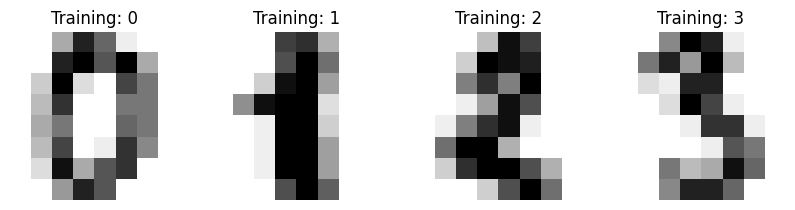

In [31]:
_, axes =  plt.subplots(nrows =1, ncols = 4, figsize=(10,3))
for ax, image, label in zip(axes, df1.images, df1.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training: %i" % label)

## **Data Preprocessing**

In [32]:
df1.images.shape

(1797, 8, 8)

In [33]:
df1.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [34]:
df1.images.shape

(1797, 8, 8)

In [35]:
len(df1.images)

1797

In [36]:
n_samples = len(df1.images)
data = df1.images.reshape((n_samples, -1))

In [37]:
data[0].shape

(64,)

In [38]:
data.shape

(1797, 64)

## **Sacaling Image Data**

In [39]:
data.min()

0.0

In [40]:
data.max()

16.0

In [41]:
data = data/16

In [42]:
data.min()

0.0

In [43]:
data.max()

1.0

In [44]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split Data**

In [45]:
X_train,X_test,y_train, y_test = train_test_split(data, df1.target, test_size= 0.3)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [52]:
y_pred = rf.predict(X_test)

In [53]:
y_pred

array([2, 3, 1, 0, 9, 9, 3, 5, 1, 7, 8, 6, 5, 3, 4, 2, 9, 9, 4, 6, 7, 5,
       2, 8, 9, 6, 9, 5, 0, 4, 9, 3, 5, 7, 1, 8, 9, 0, 8, 0, 5, 3, 4, 5,
       5, 1, 2, 4, 2, 7, 7, 9, 4, 0, 1, 7, 5, 0, 1, 4, 7, 6, 0, 9, 9, 0,
       6, 2, 3, 0, 0, 6, 7, 6, 6, 8, 2, 6, 8, 6, 4, 9, 7, 6, 3, 4, 1, 5,
       2, 9, 9, 0, 6, 2, 9, 2, 2, 6, 4, 1, 5, 5, 6, 4, 7, 1, 0, 1, 8, 8,
       6, 3, 4, 3, 2, 6, 2, 5, 9, 3, 4, 0, 4, 9, 3, 3, 2, 2, 1, 2, 1, 1,
       4, 3, 7, 1, 9, 2, 5, 5, 6, 1, 8, 5, 0, 1, 3, 0, 6, 2, 0, 8, 7, 9,
       5, 4, 5, 7, 9, 2, 6, 1, 1, 6, 3, 6, 0, 1, 6, 8, 4, 4, 6, 6, 4, 4,
       1, 7, 2, 1, 8, 8, 9, 0, 3, 7, 8, 9, 5, 5, 4, 3, 6, 4, 1, 1, 0, 1,
       7, 5, 3, 3, 5, 7, 2, 8, 6, 6, 5, 5, 9, 3, 2, 3, 6, 2, 4, 3, 0, 3,
       8, 4, 6, 3, 5, 3, 3, 2, 9, 9, 7, 8, 7, 4, 1, 1, 6, 5, 3, 5, 4, 3,
       5, 9, 9, 5, 8, 2, 0, 3, 9, 2, 4, 5, 3, 9, 4, 3, 2, 7, 9, 7, 9, 8,
       3, 5, 8, 4, 3, 9, 9, 8, 5, 1, 9, 7, 6, 3, 5, 4, 7, 7, 6, 1, 1, 1,
       3, 5, 4, 7, 6, 9, 3, 4, 0, 4, 6, 0, 5, 2, 0,

# Model  Accuracy

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
confusion_matrix(y_test, y_pred)

array([[43,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  1, 57]])

In [56]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.95      1.00      0.98        60
           2       1.00      0.98      0.99        54
           3       1.00      0.94      0.97        54
           4       0.98      0.98      0.98        57
           5       0.98      0.95      0.96        56
           6       0.98      1.00      0.99        54
           7       0.92      1.00      0.96        60
           8       0.93      0.93      0.93        40
           9       0.97      0.93      0.95        61

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## **Explaination**

97% accuracy was achieved from the classification process using Random Forest  Classifier